In [1]:
import pandas as pd
import numpy as np
import torch
%matplotlib inline
import matplotlib.pyplot as plt
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
#print(train_set.values)
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [472]:
df = pd.concat([train_set], axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [473]:
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

In [474]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [475]:
One_hot_encoding = pd.get_dummies(df['Embarked'], prefix='Embarked')
One_hot_encoding.head()
df = pd.concat([df, One_hot_encoding], axis=1)
df = df.drop(['Embarked'], axis=1)
df.values

array([[0., 3., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 3., 0., ..., 0., 0., 1.],
       ...,
       [0., 3., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 0., 0.],
       [0., 3., 1., ..., 0., 1., 0.]])

In [476]:
j = 0
index = df['Age'].copy()
index[np.isnan(index)] = train_set["Age"].mean()
df['Age'] = index


In [742]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0.827377,1,-0.592481,0.432793,-0.473674,-0.502445,0,0,1
1,1,-1.566107,0,0.638789,0.432793,-0.473674,0.786845,1,0,0
2,1,0.827377,0,-0.284663,-0.474545,-0.473674,-0.488854,0,0,1
3,1,-1.566107,0,0.407926,0.432793,-0.473674,0.420730,0,0,1
4,0,0.827377,1,0.407926,-0.474545,-0.473674,-0.486337,0,0,1


In [740]:
df1 = pd.concat([test_set])
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [743]:
df1 = pd.concat([test_set])
df1 = df1.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
df1['Sex'] = df1['Sex'].astype('category')
df1['Sex'] = df1['Sex'].cat.codes

One_hot_encoding = pd.get_dummies(df1['Embarked'], prefix='Embarked')
One_hot_encoding.head()
df1 = pd.concat([df1, One_hot_encoding], axis=1)
df1 = df1.drop(['Embarked'], axis=1)
j = 0
index = df1['Age'].copy()
index[np.isnan(index)] = test_set["Age"].mean()
df1['Age'] = index

index = df1['Fare'].copy()
index[np.isnan(index)] = test_set["Fare"].mean()
df1['Fare'] = index

for var in continuous:
    df1[var] = df1[var].astype('float64')
    df1[var] = scaler.fit_transform(df1[var].values.reshape(-1, 1))
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,1,0.334993,-0.499470,-0.400248,-0.498407,0,1,0
1,0.873482,0,1.325530,0.616992,-0.400248,-0.513274,0,0,1
2,-0.315819,1,2.514175,-0.499470,-0.400248,-0.465088,0,1,0
3,0.873482,1,-0.259330,-0.499470,-0.400248,-0.483466,0,0,1
4,0.873482,0,-0.655545,0.616992,0.619896,-0.418471,0,0,1


In [744]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
BATCH_SIZE = 32
X_train = torch.tensor(df.drop(['Survived'], axis=1).values.astype(np.float32))
Y_train = torch.tensor(df['Survived'].values.astype(np.float32))
X_test = torch.tensor(df1.values.astype(np.float32))
print(df['Survived'].values.shape[0])
print(Y_train.shape)
new_shape = (df['Survived'].values.shape[0], 1)
Y_train = Y_train.view(new_shape)
print(X_train[0:3])
print(torch.cat((X_train[0:3], X_train[3:5])))
train_tensor = TensorDataset(X_train, Y_train)
train_loader = DataLoader(dataset=train_tensor, batch_size=BATCH_SIZE, shuffle=False)
test_tensor = TensorDataset(X_test)
test_loader = DataLoader(dataset=test_tensor, batch_size=BATCH_SIZE, shuffle=False)

891
torch.Size([891])
tensor([[ 0.8274,  1.0000, -0.5925,  0.4328, -0.4737, -0.5024,  0.0000,  0.0000,
          1.0000],
        [-1.5661,  0.0000,  0.6388,  0.4328, -0.4737,  0.7868,  1.0000,  0.0000,
          0.0000],
        [ 0.8274,  0.0000, -0.2847, -0.4745, -0.4737, -0.4889,  0.0000,  0.0000,
          1.0000]])
tensor([[ 0.8274,  1.0000, -0.5925,  0.4328, -0.4737, -0.5024,  0.0000,  0.0000,
          1.0000],
        [-1.5661,  0.0000,  0.6388,  0.4328, -0.4737,  0.7868,  1.0000,  0.0000,
          0.0000],
        [ 0.8274,  0.0000, -0.2847, -0.4745, -0.4737, -0.4889,  0.0000,  0.0000,
          1.0000],
        [-1.5661,  0.0000,  0.4079,  0.4328, -0.4737,  0.4207,  0.0000,  0.0000,
          1.0000],
        [ 0.8274,  1.0000,  0.4079, -0.4745, -0.4737, -0.4863,  0.0000,  0.0000,
          1.0000]])


In [584]:
import torch
import torch.nn as nn
class NN(nn.Module):

    def __init__(self, nodes, num_layers):
        super(NN, self).__init__()

        self.input = nn.Linear(9, nodes)
        self.layers = []
        for i in range(num_layers - 1):
            self.layers.append(nn.Linear(nodes, nodes))
        #self.layer1 = nn.Linear(nodes, nodes)
        #self.layer2 = nn.Linear(nodes, nodes)
        self.layer3 = nn.Linear(nodes, 1)
        self.norm = nn.BatchNorm1d(nodes)
        #self.flatten = nn.Flatten()


    def forward(self, x):

        x = self.input(x)
        x = nn.functional.relu(x)
        x = self.norm(x)
        
        for i in self.layers:
            x = i(x)
            x = nn.functional.relu(x)
            x = self.norm(x)

        '''x = self.layer1(x)
        x = nn.functional.relu(x)
        x = self.norm(x)
        
        x = self.layer2(x)
        x = nn.functional.relu(x)
        x = self.norm(x)'''
        
        x = self.layer3(x)
        logits = torch.sigmoid(x)
        #print(x)
        #probs = F.softmax(logits, dim=1)
        return logits

In [585]:
def train(train_loader, model, criterion, optimizer):
    '''
    Train one epoch.
    '''

    model.train()
    running_loss = 0
    
    for X, y_true in train_loader:

        optimizer.zero_grad()

    
        # Forward pass
        y_hat = model(X) 

        loss = criterion(y_hat, y_true)
        #print(loss)
        running_loss += loss.item() * X.size(0)

        # Backward pass
        loss.backward()
        optimizer.step()
        
    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss

In [586]:
def validate(valid_loader, model, criterion):
    '''
    Function for the validation step of the training loop.
    Returns the model and the loss on the test set.
    '''
   
    model.eval()
    running_loss = 0
    
    for X, y_true in valid_loader:

        # Forward pass and record loss
        #optimizer.zero_grad()

    
        y_hat = model(X) 
        loss = criterion(y_hat, y_true)
        
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)
        
    return model, epoch_loss

In [669]:
def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, print_every=1):
    '''
    Function defining the entire training loop
    '''
    
    # set objects for storing metrics
    best_loss = 1e10
    train_losses = []
    valid_losses = []
    train_accs = []
    valid_accs = []
 
    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):
            
            train_acc = get_accuracy(model, train_loader,)
            train_accs.append(train_acc)
            valid_acc = get_accuracy(model, valid_loader)
            valid_accs.append(valid_acc)
                
            '''print(f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')'''
    
    performance = {
        'train_losses':train_losses,
        'valid_losses': valid_losses,
        'train_acc': train_accs,
        'valid_acc':valid_accs
    }
    
    return model, optimizer, performance

In [670]:
def get_accuracy(model, data_loader):
    '''
    Function for computing the accuracy of the predictions over the entire data_loader
    '''
    
    correct_pred = 0 
    n = 0
    
    with torch.no_grad():
        model.train()
        for X, y_true in data_loader:

            predicted_labels = model(X)
            #pred_y = torch.argmax(predicted_labels, dim=1)
            pred_y = predicted_labels
            #....

            n += y_true.size(0)
            correct_pred += ((pred_y > 0.5) == y_true).sum()

    return correct_pred.float() / n


    
def plot_performance(performance):
    '''
    Function for plotting training and validation losses
    '''
    
    # temporarily change the style of the plots to seaborn 
    plt.style.use('seaborn')

    fig, ax = plt.subplots(1, 2, figsize = (16, 4.5))
    for key, value in performance.items():
        if 'loss' in key:
            ax[0].plot(value, label=key) 
        else:
            ax[1].plot(value, label=key) 
    ax[0].set(title="Loss  over epochs", 
            xlabel='Epoch',
            ylabel='Loss')
    ax[1].set(title="accuracy over epochs", 
            xlabel='Epoch',
            ylabel='Loss')
    ax[0].legend()
    ax[1].legend()
    plt.show()
    
    # change the plot style to default
    plt.style.use('default')    

In [671]:
#print(torch.utils.data.Subset(train_loader, 0))
#print(len(train_loader))
num = 0
for i, j in train_loader:
    #print(j)
    num += 1
#print(num)
def cross_validation(nodes, num_layers):
    performance_list = []
    for i in range(0, 890, 178):
        indices = []
        '''for j in range(28):
            indices.append(j)'''
        #validation1 = torch.utils.data.Subset(train_tensor, [i, i+1, i+2, i+3])
        validation1_x = X_train[i:i+178]
        validation1_y = Y_train[i:i+178]
        validation1 = TensorDataset(validation1_x, validation1_y)
        validation1 = DataLoader(dataset=validation1, batch_size=BATCH_SIZE, shuffle=False)
        '''for j in range(i, i+4):
            indices.remove(j)'''
        #train1 = torch.utils.data.Subset(train_tensor, indices)
        train1_x = torch.cat((X_train[0:i], X_train[i+178:]))
        train1_y = torch.cat((Y_train[0:i], Y_train[i+178:]))
        train1 = TensorDataset(train1_x, train1_y)
        train1 = DataLoader(dataset=train1, batch_size=BATCH_SIZE, shuffle=False)
        #print(type(train_loader), type(train1))
        model = NN(nodes, num_layers)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.BCELoss()
        model, optimizer, performance_1 = training_loop(model, criterion, optimizer, train1, validation1, 15)
        performance_list.append(performance_1)
    return performance_list

In [673]:
acc_200 = []
acc_400 = []
acc_600 = []
acc_800 = []

m = 0
for i in range(2, 10):
    p = cross_validation(200, i)
    acc_200.append([])
    for j in p:
        #print(j['valid_acc'][-1])   
        acc_200[m].append(j['valid_acc'][-1])
    
    acc_400.append([])
    p2 = cross_validation(400, i)
    for j in p2:
        #print(j['valid_acc'][-1])
        acc_400[m].append(j['valid_acc'][-1])
    
    acc_600.append([])
    p3 = cross_validation(600, i)
    for j in p3:
        #print(j['valid_acc'][-1])
        acc_600[m].append(j['valid_acc'][-1])
    
    acc_800.append([])
    p4 = cross_validation(800, i)
    for j in p4:
        #print(j['valid_acc'][-1])
        acc_800[m].append(j['valid_acc'][-1])
    m += 1

In [675]:
def plot_result(accuracy):
    j = 2
    for i in accuracy:
        plt.scatter([j] * len(i), i)
        j += 1

    # plot the trend line with error bars that correspond to standard deviation
    accuracies_mean = np.array([np.mean(v) for v in accuracy])
    accuracies_std = np.array([np.std(v) for v in accuracy])
    #print(accuracies_mean)
    plt.errorbar([2,3,4,5,6,7,8,9], accuracies_mean, yerr=accuracies_std)
    plt.title('Cross-validation on k')
    plt.xlabel('# of layers')
    plt.ylabel('Cross-validation accuracy')
    plt.show()

In [780]:
acc_400.append([])
p2 = cross_validation(400, 2)
print(p2)
for j in p2:
    #print(j['valid_acc'][-1])
    acc_400[m].append(j['valid_acc'][-1])

[{'train_losses': [0.5862801635917406, 0.4365012046331109, 0.39646938781751656, 0.37354178914766323, 0.3557134026355864, 0.3405373623127021, 0.32607958641368245, 0.3132017535506258, 0.2998667200517855, 0.2870774666294142, 0.2754278654365854, 0.26298708756040223, 0.25139342898406286, 0.2399177702998045, 0.22851629534848608], 'valid_losses': [0.5382718008555724, 0.4778337739826588, 0.46967019659749576, 0.46681968817550146, 0.4672686303599497, 0.46549859709953995, 0.46540149209204684, 0.46488469504238517, 0.46554887763569863, 0.46796073471562244, 0.46818328171633605, 0.473633705565099, 0.4762020419152935, 0.4782579645012202, 0.479947048626589], 'train_acc': [tensor(0.8008), tensor(0.8233), tensor(0.8457), tensor(0.8569), tensor(0.8654), tensor(0.8668), tensor(0.8794), tensor(0.8864), tensor(0.8906), tensor(0.8962), tensor(0.9074), tensor(0.9130), tensor(0.9158), tensor(0.9243), tensor(0.9299)], 'valid_acc': [tensor(0.7079), tensor(0.7472), tensor(0.7640), tensor(0.7528), tensor(0.7528), t

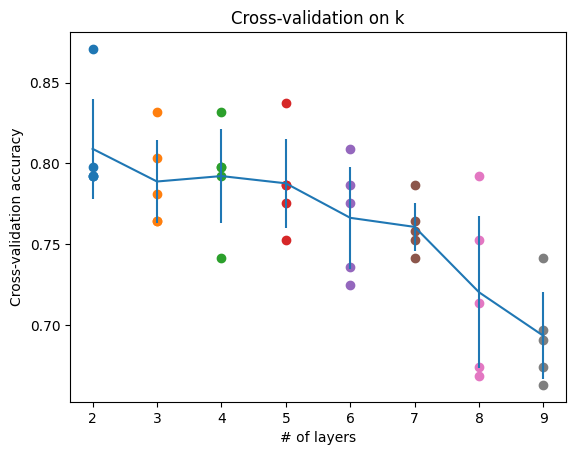

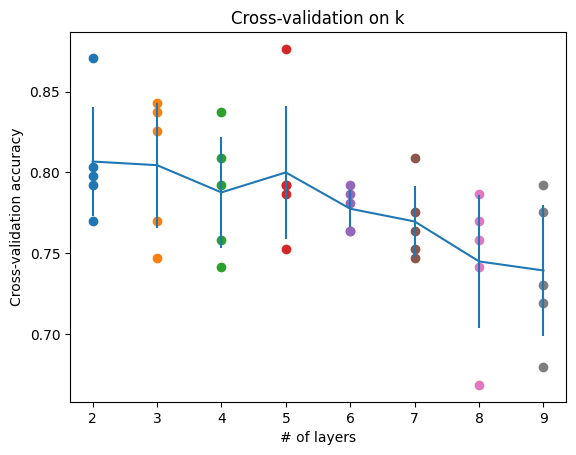

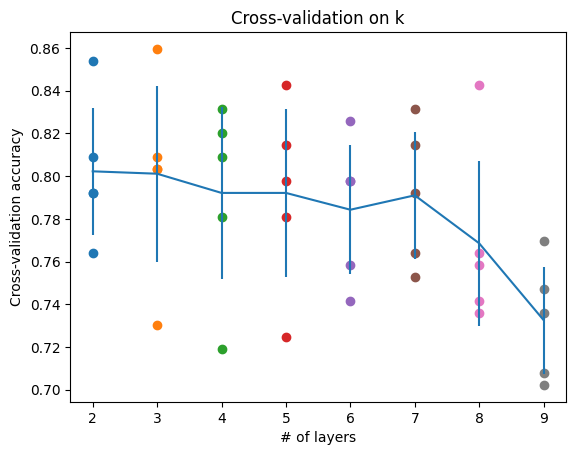

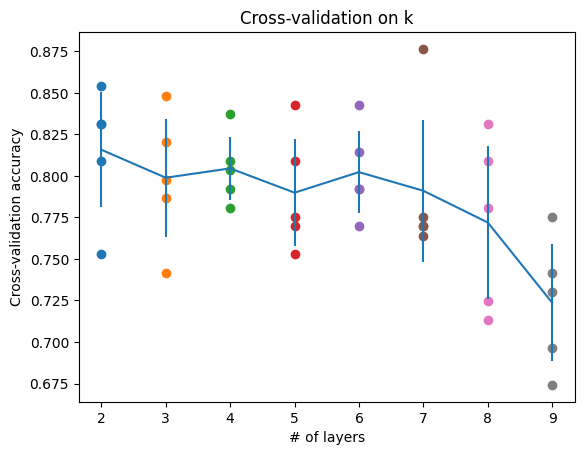

In [676]:
plot_result(acc_200)
plot_result(acc_400)
plot_result(acc_600)
plot_result(acc_800)

In [781]:
model = NN(400, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()
final_model, optimizer, performance_1 = training_loop(model, criterion, optimizer, train_loader, train_loader, 15)

In [749]:
result = []
j = 0
for x in test_loader:
    print(j,x)
    result.append(final_model(x[0]))
    j+=1

0 [tensor([[ 0.8735,  1.0000,  0.3350, -0.4995, -0.4002, -0.4984,  0.0000,  1.0000,
          0.0000],
        [ 0.8735,  0.0000,  1.3255,  0.6170, -0.4002, -0.5133,  0.0000,  0.0000,
          1.0000],
        [-0.3158,  1.0000,  2.5142, -0.4995, -0.4002, -0.4651,  0.0000,  1.0000,
          0.0000],
        [ 0.8735,  1.0000, -0.2593, -0.4995, -0.4002, -0.4835,  0.0000,  0.0000,
          1.0000],
        [ 0.8735,  0.0000, -0.6555,  0.6170,  0.6199, -0.4185,  0.0000,  0.0000,
          1.0000],
        [ 0.8735,  1.0000, -1.2895, -0.4995, -0.4002, -0.4734,  0.0000,  0.0000,
          1.0000],
        [ 0.8735,  0.0000, -0.0216, -0.4995, -0.4002, -0.5020,  0.0000,  1.0000,
          0.0000],
        [-0.3158,  1.0000, -0.3386,  0.6170,  0.6199, -0.1188,  0.0000,  0.0000,
          1.0000],
        [ 0.8735,  0.0000, -0.9725, -0.4995, -0.4002, -0.5092,  1.0000,  0.0000,
          0.0000],
        [ 0.8735,  1.0000, -0.7348,  1.7335, -0.4002, -0.2058,  0.0000,  0.0000,
          1.0000

In [704]:
i = 0
solution = []
print(type(X_test))
for x in test_loader:
    print(type(result[i]), type(x[0]))
    solution.append()

<class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'>


TypeError: list.append() takes exactly one argument (0 given)

In [772]:
result = final_model(torch.tensor(df1.values.astype(np.float32)))
print(torch.tensor(df1.values.astype(np.float32)))

tensor([[ 0.8735,  1.0000,  0.3350,  ...,  0.0000,  1.0000,  0.0000],
        [ 0.8735,  0.0000,  1.3255,  ...,  0.0000,  0.0000,  1.0000],
        [-0.3158,  1.0000,  2.5142,  ...,  0.0000,  1.0000,  0.0000],
        ...,
        [ 0.8735,  1.0000,  0.6520,  ...,  0.0000,  0.0000,  1.0000],
        [ 0.8735,  1.0000,  0.0000,  ...,  0.0000,  0.0000,  1.0000],
        [ 0.8735,  1.0000,  0.0000,  ...,  1.0000,  0.0000,  0.0000]])


In [773]:
print(result)

tensor([[0.0538],
        [0.1995],
        [0.0135],
        [0.1058],
        [0.2390],
        [0.1131],
        [0.6899],
        [0.1213],
        [0.5942],
        [0.0165],
        [0.1079],
        [0.1982],
        [0.9775],
        [0.0588],
        [0.9575],
        [0.8981],
        [0.1255],
        [0.2771],
        [0.3654],
        [0.2025],
        [0.4391],
        [0.5676],
        [0.9969],
        [0.8251],
        [0.7870],
        [0.0239],
        [0.9949],
        [0.2671],
        [0.3006],
        [0.0088],
        [0.0658],
        [0.1134],
        [0.1920],
        [0.2040],
        [0.8134],
        [0.2510],
        [0.3390],
        [0.6497],
        [0.0952],
        [0.6033],
        [0.1086],
        [0.4940],
        [0.0960],
        [0.9375],
        [0.9742],
        [0.0931],
        [0.1356],
        [0.0540],
        [0.9228],
        [0.3350],
        [0.4482],
        [0.1993],
        [0.8896],
        [0.5628],
        [0.1449],
        [0

In [774]:
result = result.detach().numpy()
for i in range(len(result)):
    if result[i][0] > 0.5:
        result[i] = 1
    else:
        result[i] = 0
print(result)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.

In [777]:
test_set['Survived'] = result
test_set['Survived'] = test_set['Survived'].astype('int')
final_prediction = test_set[['PassengerId', 'Survived']]
final_prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [778]:
final_prediction.to_csv('titanic_neural_network.csv', index=False)

In [707]:
print(X_test.isn)

tensor([[ 0.8735,  1.0000,  0.3350,  ...,  0.0000,  1.0000,  0.0000],
        [ 0.8735,  0.0000,  1.3255,  ...,  0.0000,  0.0000,  1.0000],
        [-0.3158,  1.0000,  2.5142,  ...,  0.0000,  1.0000,  0.0000],
        ...,
        [ 0.8735,  1.0000,  0.6520,  ...,  0.0000,  0.0000,  1.0000],
        [ 0.8735,  1.0000,  0.0000,  ...,  0.0000,  0.0000,  1.0000],
        [ 0.8735,  1.0000,  0.0000,  ...,  1.0000,  0.0000,  0.0000]])


In [717]:
list3 = []
for x in test_loader:
    list3.append(x[0])
for x in list3:
    print(type(x))
asdf = torch.cat((x for x in list3))
print(asdf)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


TypeError: cat(): argument 'tensors' (position 1) must be tuple of Tensors, not generator

In [750]:
result = []
for x in train_loader:
    #print(x)
    result.append(final_model(x[0]))

In [751]:
print(result)

[tensor([[0.1266],
        [0.9753],
        [0.6097],
        [0.9943],
        [0.0655],
        [0.0229],
        [0.0094],
        [0.0310],
        [0.8003],
        [0.9552],
        [0.8761],
        [0.9823],
        [0.0166],
        [0.0046],
        [0.3067],
        [0.8920],
        [0.0282],
        [0.1392],
        [0.3205],
        [0.8307],
        [0.1585],
        [0.2009],
        [0.6350],
        [0.8148],
        [0.0501],
        [0.5140],
        [0.0178],
        [0.0862],
        [0.9330],
        [0.0534],
        [0.0627],
        [0.9505]], grad_fn=<SigmoidBackward0>), tensor([[0.9428],
        [0.0299],
        [0.4439],
        [0.1386],
        [0.1637],
        [0.0306],
        [0.0480],
        [0.7972],
        [0.1167],
        [0.7801],
        [0.1804],
        [0.9869],
        [0.8334],
        [0.0360],
        [0.0403],
        [0.9428],
        [0.0533],
        [0.1910],
        [0.0068],
        [0.0301],
        [0.9940],
        [0.8136

In [727]:
for i in np.isnan(X_test):
    for j in i:
        

tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtyp

tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
tensor(0, dtyp